# INF250: Mandatory Exercise03

- Author: Mahrin Tasfe
- Email: mahrin.tasfe@nmbu.no
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------

# Solution starts here
--------------------------------------------------------------------------------------------

In [1]:
# Importing all the necessary modules
from spectral import * 
import numpy as np
import matplotlib.pyplot as plt
import skimage
import math

# Task1: Loading the image

In [2]:
hyperim = np.load("sandvika.npy")

# Task 2: Getting the bands numbers

In [3]:
# Function for finding the required bands
def find_bands(all_wavelengths,required_wavelengths):
    required_bands = {}
    
    for wavelength in required_wavelengths.keys():
            min_distance = None
            min_wave_val = None
            band = None
            for index, wave_val in enumerate(all_wavelengths): 
                current_distance = abs(wavelength - wave_val)
                if min_distance == None:
                    min_distance = current_distance
                    min_wave_val = wave_val
                    band = index+1
                elif current_distance> min_distance:
                    break
                elif current_distance< min_distance:
                    min_distance = current_distance
                    min_wave_val = wave_val
                    band = index +1    

            band_name = required_wavelengths[wavelength]
            required_bands[band_name]=band        
    return required_bands

In [4]:
# Calling the function to get required wavelength bands
wavelength = envi.read_envi_header('Visnir.hdr')['wavelength']
all_wavelengths = [float(i) for i in wavelength]
required_wavelengths = {440:"blue", 535:'green', 645:'red', 800:'NIR'}
required_bands = find_bands(all_wavelengths, required_wavelengths)
print("required_bands", required_bands)

required_bands {'blue': 11, 'green': 41, 'red': 76, 'NIR': 124}


In [5]:
#Organising the RGB bands in list format
print("required_bands", required_bands)   
RGB_bands = [required_bands['red'],required_bands['green'],required_bands['blue']]
print("RGB_bands", RGB_bands)
NIR_band = required_bands['NIR']
print("NIR_band", NIR_band)
red_band = required_bands['red']
print("red_band", red_band)

required_bands {'blue': 11, 'green': 41, 'red': 76, 'NIR': 124}
RGB_bands [76, 41, 11]
NIR_band 124
red_band 76


# Task3: Display the RGB Image:


#### Diplaying RGB image with only 1 band for each color

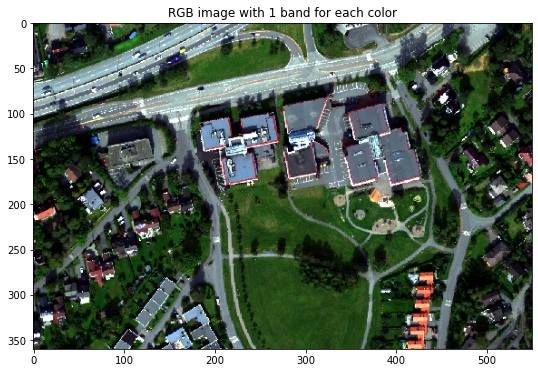

In [6]:
imshow(hyperim, bands = RGB_bands, stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)), figsize=(10,6))
plt.title("RGB image with 1 band for each color")
plt.show()

#### Diplaying RGB image with an average of range of bands (10 bands) for each color

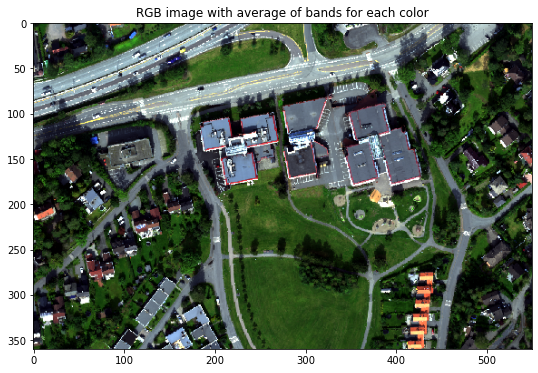

In [7]:
RGB_average_hyperim = hyperim[:, :, :]

blue_avg = RGB_average_hyperim [:, :, 10:20 ].mean(axis=2)
green_avg = RGB_average_hyperim [:, :, 40:50 ].mean(axis=2)
red_avg = RGB_average_hyperim [:, :, 65:75 ].mean(axis=2)

shape = RGB_average_hyperim.shape
RGB_avg = np.zeros([shape[0], shape[1], 3])
RGB_avg[:, :, 0] = red_avg
RGB_avg[:, :, 1] = green_avg
RGB_avg[:, :, 2] = blue_avg

imshow(RGB_avg, stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)), figsize=(10,6))
plt.title("RGB image with average of bands for each color")
plt.show()

#### Comment on the RGB image with 1 band and the RGB image with the average of bands.
Each of the color belongs to multiple bands, so instead of taking just 1 band, if we take a range of bands(10 bands) belonging to that color, the image quality is improved.

# Task4: NDVI Index calculation

#### NDVI calculating using the equation/formula

In [8]:
np.seterr(invalid='ignore')
ndvi_image_manual = (hyperim[:,:,NIR_band]-hyperim[:,:,red_band])/(hyperim[:,:,NIR_band]+hyperim[:,:,red_band])

#### NDVI calculating using the python function

In [9]:
np.seterr(invalid='ignore')
ndvi_image_python = ndvi(hyperim,red_band, NIR_band)

# Task5: NDVI Image

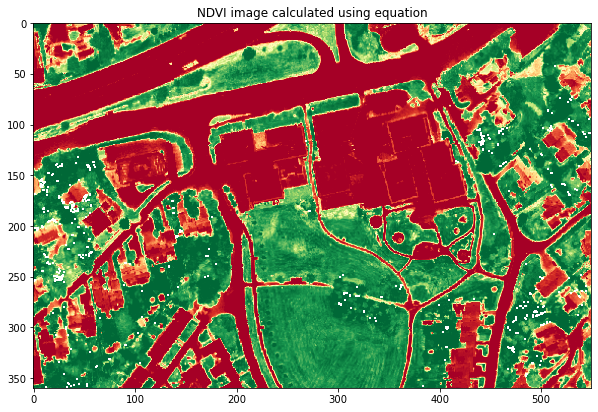

In [10]:
# NDVI image calculated using equation
plt.figure(figsize=(10,8))
plt.imshow(ndvi_image_manual,vmin=0.1,vmax=0.9, cmap='RdYlGn') 
plt.title("NDVI image calculated using equation")
plt.show()

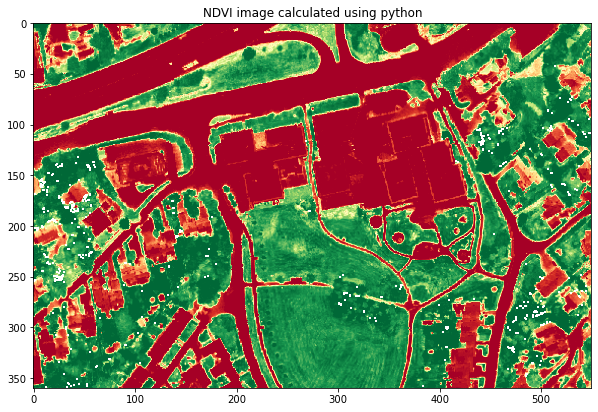

In [11]:
# NDVI image calculated using python
plt.figure(figsize=(10,8))
plt.imshow(ndvi_image_python,vmin=0.1,vmax=0.9, cmap='RdYlGn') 
plt.title("NDVI image calculated using python")
plt.show()


#### Comment on the NDVI Image

- NDVI index is from -1 to 1. Starting from NDVI 0.3, everything is considered to be vegetation. Different plants have different NDVI depening on their health. Extremely healthy plants with high chlorophyll will have NVDI 1. Everything that have a NDVI below 0.3 is almost a dead plant with low Chlorophyll level or an object.
- From the images below, we can see that all the vegetation has been displayed in green and rest in red.
- NDVI value calculated in both both ways using the python built-in function and formula are same.


# Task6: Spectra image

## Spectra image with points (vegetation, asphalt and roof) 

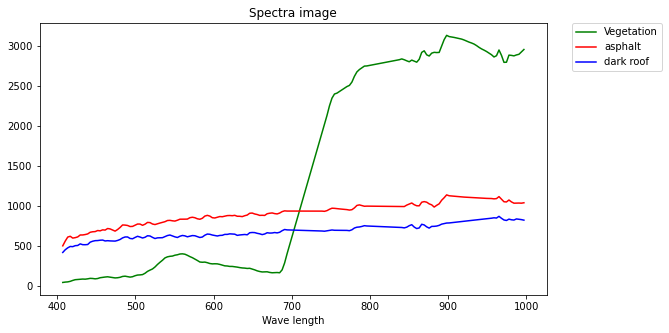

In [12]:
vegetation = np.array(hyperim[278,245,:].reshape(-1,1)) # grass
asphalt = np.array(hyperim[79,157,:].reshape(-1,1))#asphalt light
roof_dark = np.array(hyperim[99,280,:].reshape(-1,1)) # roof dark

fig, ax_dict = plt.subplot_mosaic([ ['bottom', 'BLANK']], empty_sentinel="BLANK", figsize = (20, 5))

ax_dict['bottom'].plot(all_wavelengths,  vegetation, color = 'g', label='Vegetation')
ax_dict['bottom'].plot(all_wavelengths, asphalt,color = 'r', label='asphalt')
ax_dict['bottom'].plot(all_wavelengths, roof_dark,color = 'b',label='dark roof')
# Place a legend to the right of this smaller subplot.
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.title("Spectra image")
plt.xlabel("Wave length")
# plt.ylabel("Pixel count")
plt.show()

#### Comment on the Spectra image
- We know the the Red color has the waves length from 620 to 720 nm. (Source: https://www.elprocus.com/wavelength-of-red-light/) and NIR has wavelengths from 800 to 2,500 nm. Anything that has wavelength starting after red(720nm) and before NIR(800nm) are considered vegetation.

- From the spectrum image, we can see that 
  - both asphalt and roof has very flat length, without any spikes in the vegetation considered wavelength zone.  
  - Grass(vegatation) has a spike from approximately 680nm which continued till the end, proving the presense of chlorophyll in that range of wavelength.


# Task7: histogram of all the NDVI values in the image

##### Facts about the NDVI valus:
- High values (0.66 to 1) represent very healthy plants
- Moderate values (0.33 to 0.66 ) represent moderately healthy plants
- Very low values of NDVI (0.1 and below) correspond to barren areas of rock, sand, or snow. Negative values are often water.

#####  Comment on the NDVI Histogram
From the histogram, we can see that -
- from (-0.1 to 0.19), we can see a peak in the pixel count which represents roads, roof tops and other objects found in the image.
- from (0.2 to 0.3), there are few pixel counts. So we have very few moderately healthy plants 
- from (0.7 to 0.9), we can see a peak in the pixel count which represents high number of healthy vegetation found in the image.


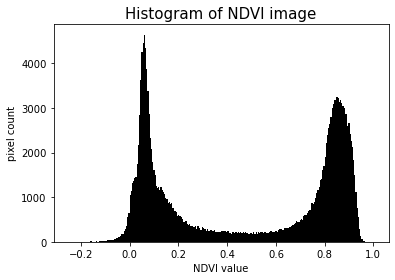

<Figure size 576x360 with 0 Axes>

In [13]:
# Creating histogram
plt.hist(ndvi_image_manual.ravel(),256, range=[-0.25,1], color='black'); 
plt.title("Histogram of NDVI image", fontsize=15)
plt.xlabel("NDVI value")
plt.ylabel("pixel count")
plt.figure(figsize=(8,5))
plt.show()

# Task8 Thresholding NDVI

In [14]:
#Thresholding NDVI
threshold = 0.6 
ndvi_image_manual[ndvi_image_manual > threshold] = 0
ndvi_image_manual[ndvi_image_manual != 0] = 255

# Task9: Findig vegetation from the NDVI Thresholded image

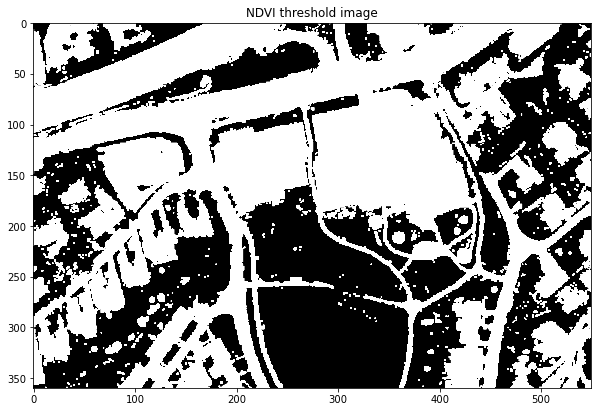

In [15]:
#Displaying the NDVI image
plt.subplots(1,1,figsize=(10,8))
plt.imshow(ndvi_image_manual,vmin=0,vmax=1, cmap='gray') 
plt.title("NDVI threshold image")
plt.show()

### Comment on Thresholed NDVI image

- We know from the NDVI 0.33, everything is considered vegetation. High values (0.66 to 1) represent very healthy plants and moderate values (0.33 to 0.66 ) represent moderately healthy plants. 

- We have set the threholding value to 0.6 which means we only want to see the **healthy vegetation**.  

- All the healthy vegetation of the image is black and rest of the elements of the image is white.

# Task10: PCA, PCA score images & Loading plots

## PCA plot and PCA image

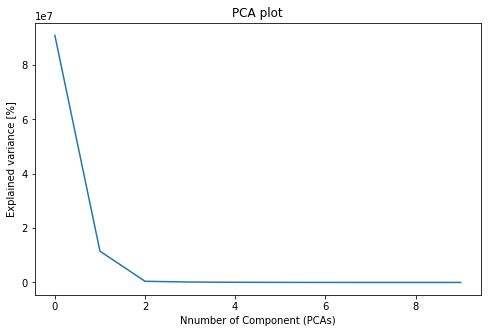

In [16]:
# Generating PCA plot to explain the variance present in the image
pc = principal_components(hyperim)
plt.figure(figsize=(8,5))
plt.plot(pc.eigenvalues[0:10])
plt.title("PCA plot")
plt.xlabel('Nnumber of Component (PCAs)')
plt.ylabel('Explained variance [%]')
plt.show()

#### Comment on the PCA plot:
- From the image below, we can see that, according to the **"Elbow method"**, only the 1st three PCs are enough to explain the variance in the image.


Number of PCA's selected 3


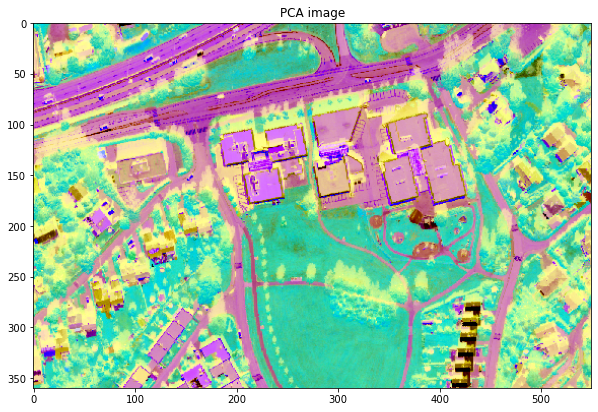

In [17]:
# PCA image calculation
pc_0994 = pc.reduce(fraction=0.994)# select the PC with 99.4% variance-
img_pc = pc_0994.transform(hyperim) # then transforming that PC with 99.4% to our original image
print("Number of PCA's selected", img_pc.shape[2])
imshow(img_pc, stretch=((0.02,0.98),(0.02,0.98),(0.02,0.98)), figsize=(10,8), title ='PCA image')
plt.show()

#### Comment on the PCA image:
- From the PCA image, we can see that the grassland has been represented in the 'green' and the trees have been represented in the 'yellow'. So, this PCA image can successfully identify the vegetation present in the image


## First 3 PCA score plots

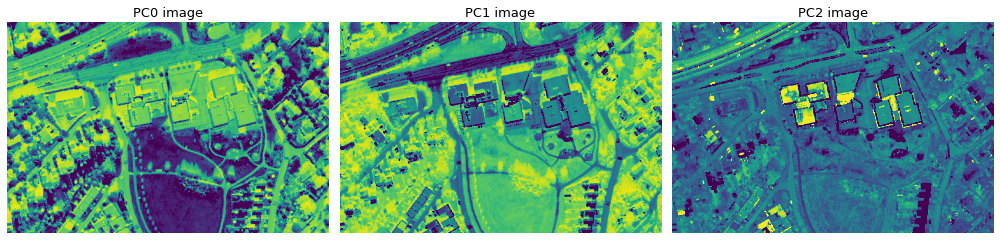

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 7))
ax[0].imshow(img_pc[:,:,0], vmin=-14629,vmax=14646)
ax[0].set_title(r'PC0 image', fontsize = 13)

ax[1].imshow(img_pc[:,:,1], vmin=-6025,vmax=4065)
ax[1].set_title(r'PC1 image', fontsize = 13)

ax[2].imshow(img_pc[:,:,2], vmin=-500,vmax=1000)
ax[2].set_title(r'PC2 image', fontsize = 13)


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

##### Analysis of the PCA score plot images
- PC0 image has identied most of the vegetation (mainly grass)
- PC1 image has identied most of the roads and roof tops
- PC3 image has identied most of the shadows and green trees


# Understaing the loading plots
loadings corresponds to wavelenths. By looking at the wavelengths, we can understand which wavelengths have been given the weights for generating that score image


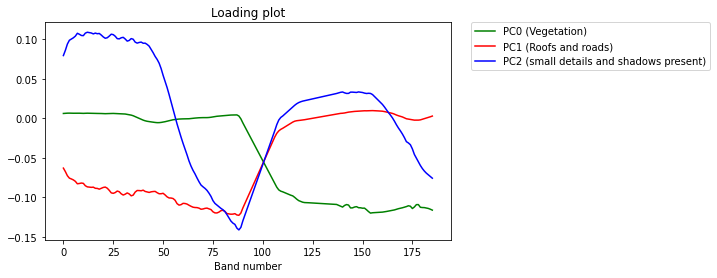

In [28]:
# loadings
loadings = pc_0994.eigenvectors 

#plotting the graph
fig, ax_dict = plt.subplot_mosaic([ ['bottom', 'BLANK']], empty_sentinel="BLANK", figsize = (16, 4))

ax_dict['bottom'].plot( loadings[:,[0]], color = 'g', label='PC0 (Vegetation)')
ax_dict['bottom'].plot( loadings[:,[1]], color = 'r', label='PC1 (Roofs and roads)')
ax_dict['bottom'].plot( loadings[:,[2]], color = 'b', label='PC2 (small details and shadows present)')
# Place a legend to the right of this smaller subplot.
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.title('Loading plot')
plt.xlabel('Band number')
# plt.ylabel("Pixel count")
plt.show()

##### Comment on the loading plot images
- PC0: vegetation (mainly grass)
- PC1: roads and roof tops
- PC3: shadows, small details and green trees

We know, the color green's band is 40. The PC0 line has a spike from 0 to 45 which mainly signifies the presense of the vegetation 

# Task11: K-means clustering with k = 2, 3, 4, 5

## Analysis of kmeans clustering with the PCA Image:

In [20]:
#Function for calculating the clusters and displaying the result images
def k_means_analysis(image, cluster_number, vmin, vmax):
    
    (m,c) = kmeans(image, cluster_number, 30) 
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
    fig.suptitle("K-means clustering with "+str(cluster_number)+" clusters", fontsize = 14)
    
    ax[0].set_title(r'Clustering image ('+str(cluster_number)+" clusters)", fontsize = 13)
    ax[0].imshow(m, cmap ='jet', vmin = vmin, vmax= vmax)

    ax[1].set_title(r'Loading plot', fontsize = 13)
    for i in range(c.shape[0]):
        ax[1].plot(c[i])
    
    
    fig.tight_layout()
    plt.show()

In [21]:
# For stopping the spectral information printing
import logging, sys
logging.disable(sys.maxsize)

##### For k-means clustering with 2 clusters: 
- Successfully identified the grass. The grass is represented in dark blue color.

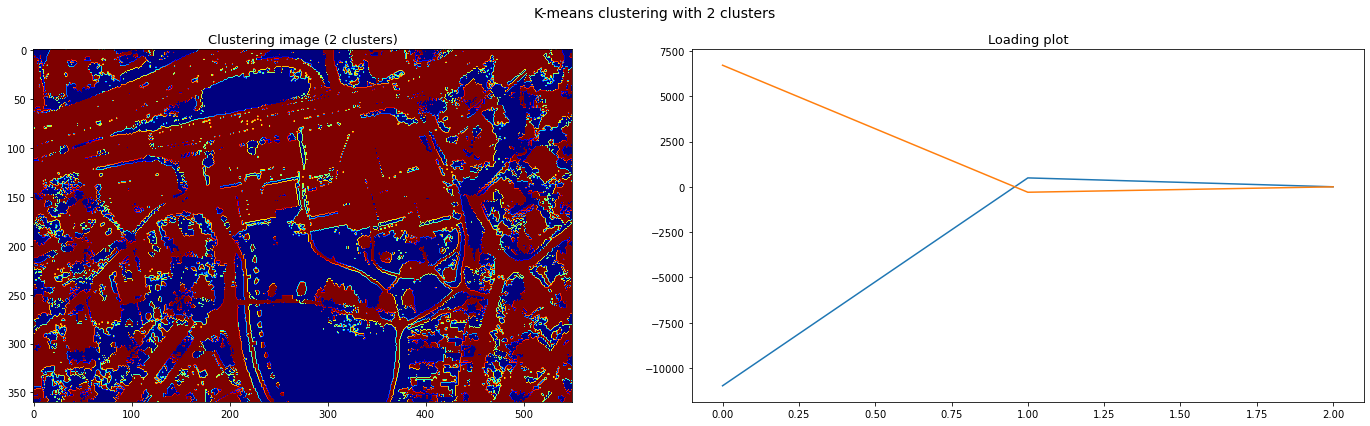

In [22]:
# 2-clusters, 30-no of iterations--On the selected PCs
k_means_analysis(img_pc, 2, vmin=0, vmax=1)

##### For k-means clustering with 3 clusters: 
- Sucessfully identified the grass. The grass is represented in Cyan color.


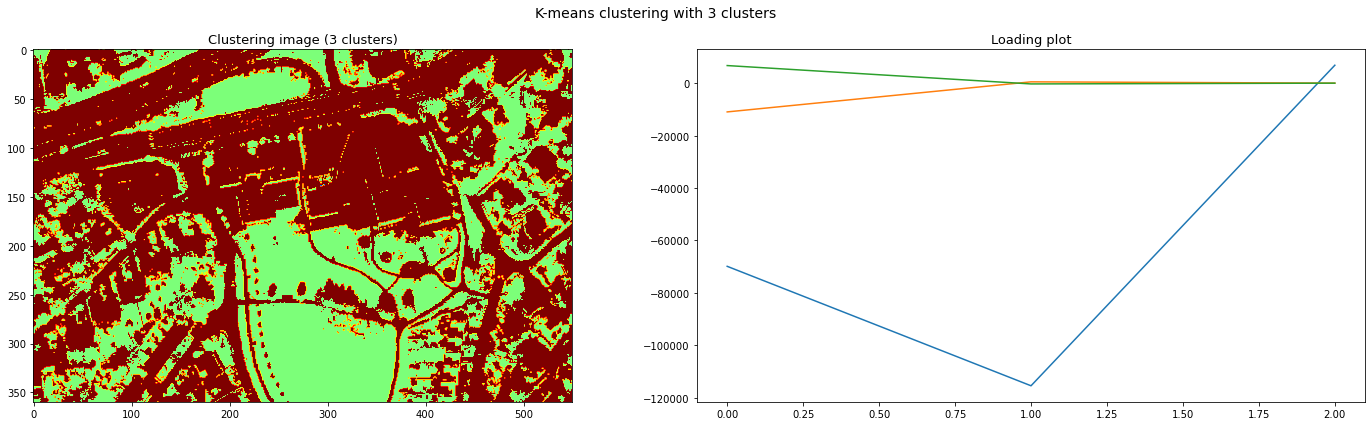

In [23]:
# 3-clusters, 30-no of iterations--On the selected PCs
k_means_analysis(img_pc, 3, vmin=0, vmax=2)

##### For k-means clustering with 4 clusters: 
- Sucessfully identified the grass, roads and few roof tops(red & light-reflecting/shiny) present in the image. 
   - The grass is represented in yellow color. 
   - The red rooftops are represented in Cyan color.
   - roads and concrete roads in brown color

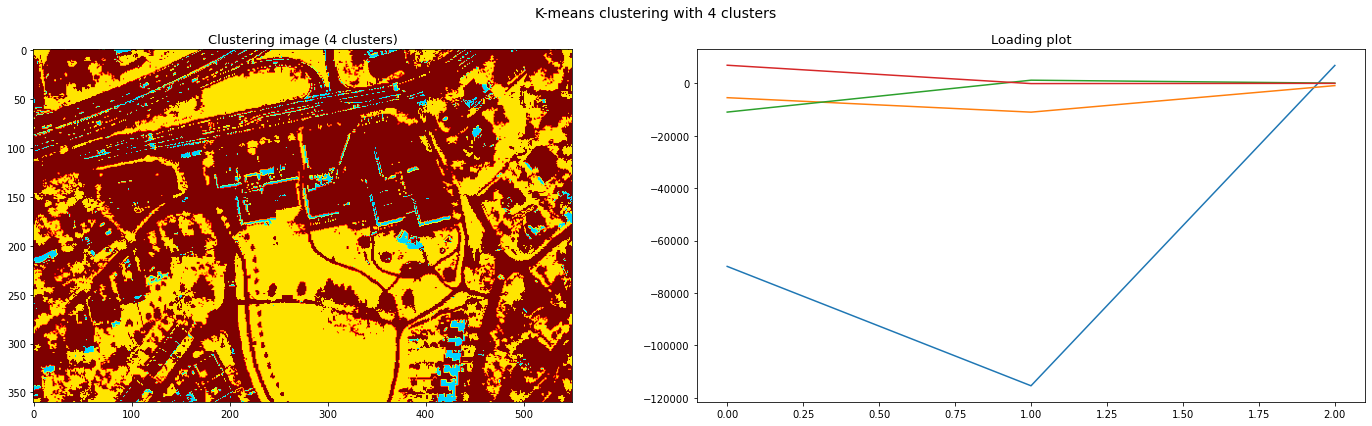

In [24]:
# 4-clusters, 30-no of iterations--On the selected PCs
k_means_analysis(img_pc, 4, vmin=0, vmax=3)

##### For k-means clustering with 5 clusters: 
- Sucessfully identified the grass, a few roof tops, and roads present in the image. 
  - The grass has been represented in orange color. 
  - The red & light-reflecting/shiny roof tops have been represented in cyan color. 
  - The light colored roads have been represented in lime color.
  - Narrow roads and concrete roof tops have been presented in dark brown color
- **Problem:** Few of the "dark green vegetation(trees)", "narrow roads" and "concrete roof tops" have been classified in the same color/group.

**The k-means clustering with 5 clusters is the best option among the other k-means clutering options**


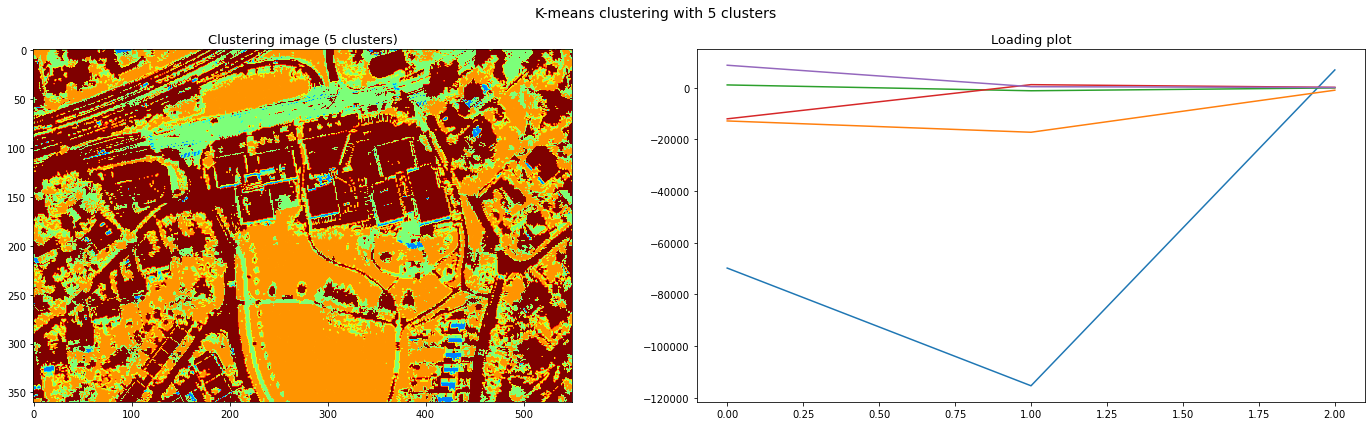

In [25]:
# 5-clusters, 30-no of iterations--On the selected PCs
k_means_analysis(img_pc, 5, vmin=0, vmax=4)

# Task-12: Determination of  the most appropriate method for identifying vegetation in this hyperspectral image

## Methods for identifing vegetation in the hyperspectral image



#### Method1:  NDVI Image
- All the vegetation of the image is green and rest of the elements of the image is red.
- **Problem:** Vegetation can be easily identified. But unable to classify between the types of vegetations properly

#### Method2:  NDVI Thresholded image
- All the vegetation of the image is black and rest of the elements of the image is white.
- **Problem:** Vegetation can be easily identified. But does not classify between the types of vegetations

#### Method3: PCA Image
- Successfully identifies the vegetation present in the image (both the grass and trees seperately)
- **BEST OPTION**: Vegetation can be easily identified and classifies between the types of vegetations

#### Method4: K-means clustering
- Sucessfully identified the grass, a few roof tops, and roads present in the image for cluster=5. 
- **Problem:** Few of the "dark green vegetation(trees)", "narrow roads" and "concrete roof tops" have been classified in the same color/group.


#### Hence, PCA Image is the best option for identifying vegetation present in the given image